<a href="https://colab.research.google.com/github/snehasamanta/emotion-detection/blob/main/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source: https://www.kaggle.com/shawon10/ckplus

In [ ]:
!unzip "/content/drive/MyDrive/datasets/emotion.zip"

Archive:  /content/drive/MyDrive/datasets/emotion.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
  inflating: CK

In [ ]:
fldr="/content/CK+48"

In [ ]:
import os
files=os.listdir(fldr)

files


['contempt', 'disgust', 'fear', 'anger', 'sadness', 'happy', 'surprise']

In [ ]:
Exp=['contempt', 'disgust', 'fear', 'anger', 'sadness', 'happy', 'surprise']

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
i=0
last=[]
images=[]
labels=[]
for fle in files:
  idx=Exp.index(fle)
  label=idx
  
  total=fldr+'/'+fle
  files_exp= os.listdir(total)

  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    print(file_main+"   "+str(label))
    image= cv2.imread(file_main)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)

/content/CK+48/contempt/S148_002_00000013.png   0
/content/CK+48/contempt/S505_002_00000020.png   0
/content/CK+48/contempt/S156_002_00000019.png   0
/content/CK+48/contempt/S505_002_00000021.png   0
/content/CK+48/contempt/S138_008_00000008.png   0
/content/CK+48/contempt/S506_002_00000008.png   0
/content/CK+48/contempt/S139_002_00000011.png   0
/content/CK+48/contempt/S151_002_00000029.png   0
/content/CK+48/contempt/S155_002_00000012.png   0
/content/CK+48/contempt/S156_002_00000020.png   0
/content/CK+48/contempt/S139_002_00000013.png   0
/content/CK+48/contempt/S506_002_00000009.png   0
/content/CK+48/contempt/S155_002_00000010.png   0
/content/CK+48/contempt/S154_002_00000012.png   0
/content/CK+48/contempt/S502_002_00000007.png   0
/content/CK+48/contempt/S148_002_00000015.png   0
/content/CK+48/contempt/S157_002_00000010.png   0
/content/CK+48/contempt/S503_002_00000008.png   0
/content/CK+48/contempt/S149_002_00000013.png   0
/content/CK+48/contempt/S151_002_00000027.png   0


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
last

[54, 231, 306, 441, 525, 732, 981]

# Contempt

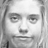

In [ ]:
cv2_imshow(images[30])

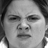

In [ ]:
cv2_imshow(images[55])


# Disgust

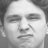

In [ ]:
cv2_imshow(images[200])

#Fear

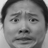

In [ ]:
cv2_imshow(images[257])

# Sadness

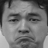

In [ ]:
cv2_imshow(images[500])

#happy

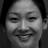

In [ ]:
cv2_imshow(images[700])

# Surprise

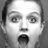

In [ ]:
cv2_imshow(images[900])

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
images_f=np.array(images)
labels_f=np.array(labels)

images_f_2=images_f/255

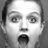

In [ ]:
cv2_imshow(images[900])

In [ ]:
images_f_2.shape

(981, 48, 48, 3)

In [ ]:
num_of_classes=7
labels_encoded=tf.keras.utils.to_categorical(labels_f,num_classes=num_of_classes)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_encoded,test_size=0.25)

# Model

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(128,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  output= Dense(7,activation="sigmoid")(drop_1)

  model = Model(inputs=[inputs], outputs=[output])

  model.compile(loss="categorical_crossentropy", optimizer="Adam",
	metrics=["accuracy"])
  return model

In [ ]:
Model=model(input_shape = (48,48,3))

In [ ]:
Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0     

#training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fle_s='/content/drive/MyDrive/datasets/Emotion_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=25,callbacks=[callback_list])

Epoch 1/25
23/23 [==============================] - 7s 299ms/step - loss: 0.0958 - accuracy: 0.9973 - val_loss: 0.1178 - val_accuracy: 0.9837

Epoch 00001: loss did not improve from 0.08780
Epoch 2/25
23/23 [==============================] - 7s 296ms/step - loss: 0.0977 - accuracy: 0.9946 - val_loss: 0.0953 - val_accuracy: 0.9959

Epoch 00002: loss did not improve from 0.08780
Epoch 3/25
23/23 [==============================] - 7s 292ms/step - loss: 0.0968 - accuracy: 0.9932 - val_loss: 0.0980 - val_accuracy: 0.9959

Epoch 00003: loss did not improve from 0.08780
Epoch 4/25
23/23 [==============================] - 7s 292ms/step - loss: 0.1047 - accuracy: 0.9918 - val_loss: 0.1174 - val_accuracy: 0.9919

Epoch 00004: loss did not improve from 0.08780
Epoch 5/25
23/23 [==============================] - 7s 294ms/step - loss: 0.1177 - accuracy: 0.9878 - val_loss: 0.1097 - val_accuracy: 0.9959

Epoch 00005: loss did not improve from 0.08780
Epoch 6/25
23/23 [==============================] 

# evaluation

In [ ]:

score = Model.evaluate(X_train, Y_train)

23/23 [==============================] - 1s 58ms/step - loss: 0.0837 - accuracy: 1.0000


In [ ]:
score = Model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 55ms/step - loss: 0.0952 - accuracy: 0.9919


In [ ]:
Pred=Model.predict(X_test)
Pred

array([[1.1651607e-07, 9.9932754e-01, 7.4624395e-01, ..., 3.6502506e-08,
        4.4347692e-01, 2.3731589e-04],
       [8.1309676e-04, 1.7690659e-03, 2.5944293e-02, ..., 5.4288495e-01,
        6.8221971e-07, 4.0167868e-03],
       [5.9107244e-03, 1.7911646e-01, 9.5311999e-03, ..., 5.6937701e-01,
        5.2174926e-04, 2.9871732e-02],
       ...,
       [5.9223566e-07, 2.4892384e-01, 2.1617085e-01, ..., 1.2275388e-08,
        9.9999499e-01, 1.4928162e-02],
       [2.5367141e-03, 7.7054799e-03, 5.0358176e-03, ..., 6.6517377e-01,
        6.8410163e-06, 2.3202688e-02],
       [1.0978928e-05, 1.5743124e-07, 6.1196500e-01, ..., 7.8808963e-03,
        3.0002730e-06, 1.0000000e+00]], dtype=float32)

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual:  " + Exp[labels[ind]]  )
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  pred_class=Exp[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)

In [ ]:
len(Pred)

246

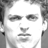

Label actual:  disgust
Predicted Label: disgust


In [ ]:
test_image(172,images_f,images_f_2,Model)

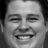

Label actual:  happy
Predicted Label: happy


In [ ]:
test_image(723,images_f,images_f_2,Model)

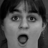

Label actual:  surprise
Predicted Label: surprise


In [ ]:
test_image(872,images_f,images_f_2,Model)

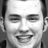

Label actual:  happy
Predicted Label: happy


In [ ]:
test_image(546,images_f,images_f_2,Model)

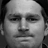

Label actual:  anger
Predicted Label: anger


In [ ]:
test_image(398,images_f,images_f_2,Model)

In [ ]:
last

[54, 231, 306, 441, 525, 732, 981]

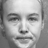

Label actual:  contempt
Predicted Label: contempt


In [ ]:
test_image(10,images_f,images_f_2,Model)

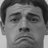

Label actual:  sadness
Predicted Label: sadness


In [ ]:
test_image(441,images_f,images_f_2,Model)

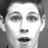

Label actual:  surprise
Predicted Label: surprise


In [ ]:
test_image(980,images_f,images_f_2,Model)

In [ ]:
import matplotlib.pyplot as plt

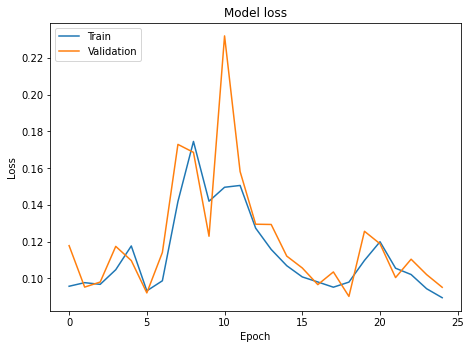

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

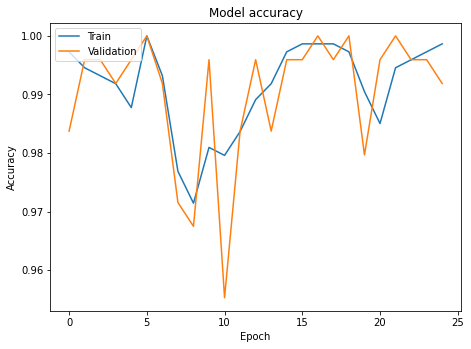

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report

In [ ]:
i=0
Y_test_l=[]
Pred_l=[]
while(i<len(Pred)):
  Y_test_l.append(int(np.argmax(Y_test[i])))
  Pred_l.append(int(np.argmax(Pred[i])))
  i+=1

In [ ]:
classification_report(Y_test_l, Pred_l)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      0.97      0.99        38\n           2       1.00      1.00      1.00        21\n           3       0.97      0.97      0.97        35\n           4       0.96      1.00      0.98        23\n           5       1.00      1.00      1.00        53\n           6       1.00      1.00      1.00        61\n\n    accuracy                           0.99       246\n   macro avg       0.99      0.99      0.99       246\nweighted avg       0.99      0.99      0.99       246\n'

In [ ]:
confusion_matrix(Y_test_l, Pred_l)

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  1,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  1,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  0,  0,  0, 61]])

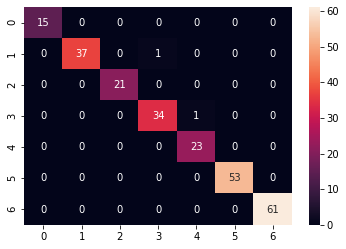

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(Y_test_l, Pred_l), annot=True)